In [156]:
import numpy as np
import vtk
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph, color_by_position
from mcopt.optimal_transport import optimal_transport, color_transfer_expected_color


%reload_ext autoreload
%autoreload 2

# Load Morse Complex

In [157]:
mc = load_complex('../data/sinusoidal')
mc_noisy = load_complex('../data/sinusoidal_noisy')

# Construct Morse Graph

In [158]:
mg = MorseGraph.from_complex(mc).simplify(3, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).simplify(3, mode='geo_dist')

## Initial Graphs

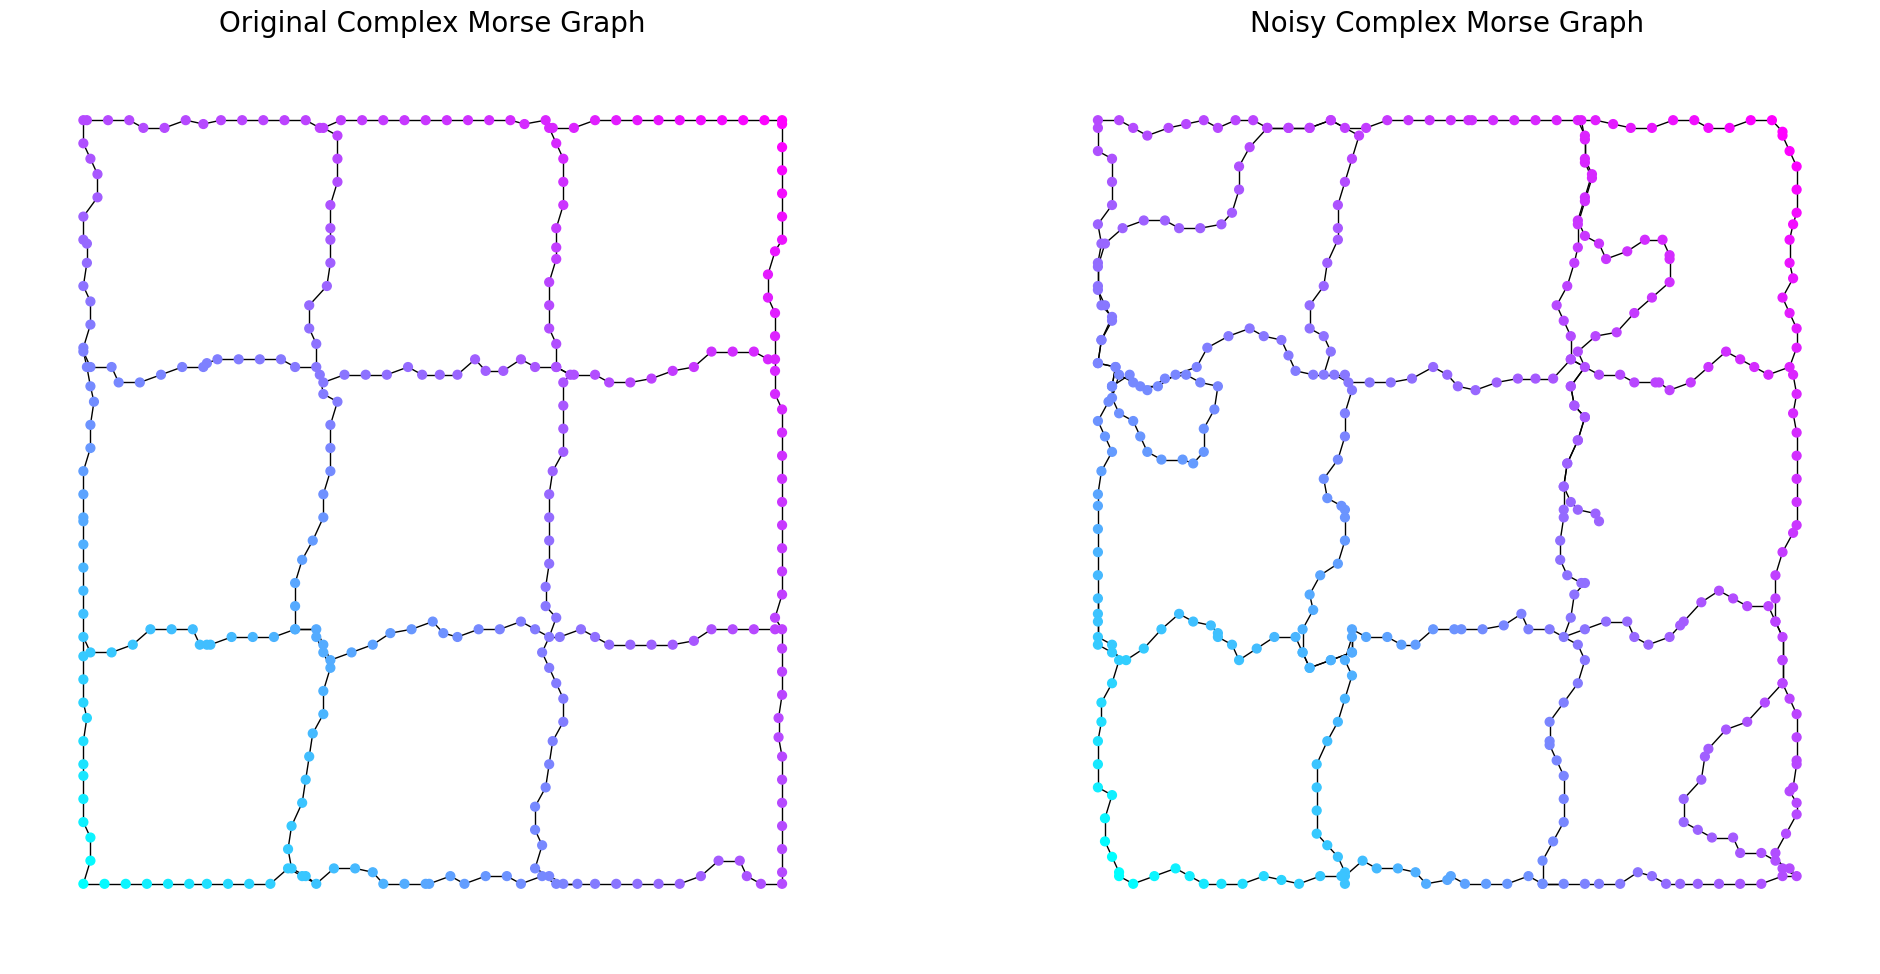

In [159]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()

# Run Optimal Transport

In [160]:
mg_net = mg.to_measure_network()
mg_noisy_net = mg_noisy.to_measure_network()

coupling = optimal_transport(mg_net, mg_noisy_net)

# Generate Color Transfer

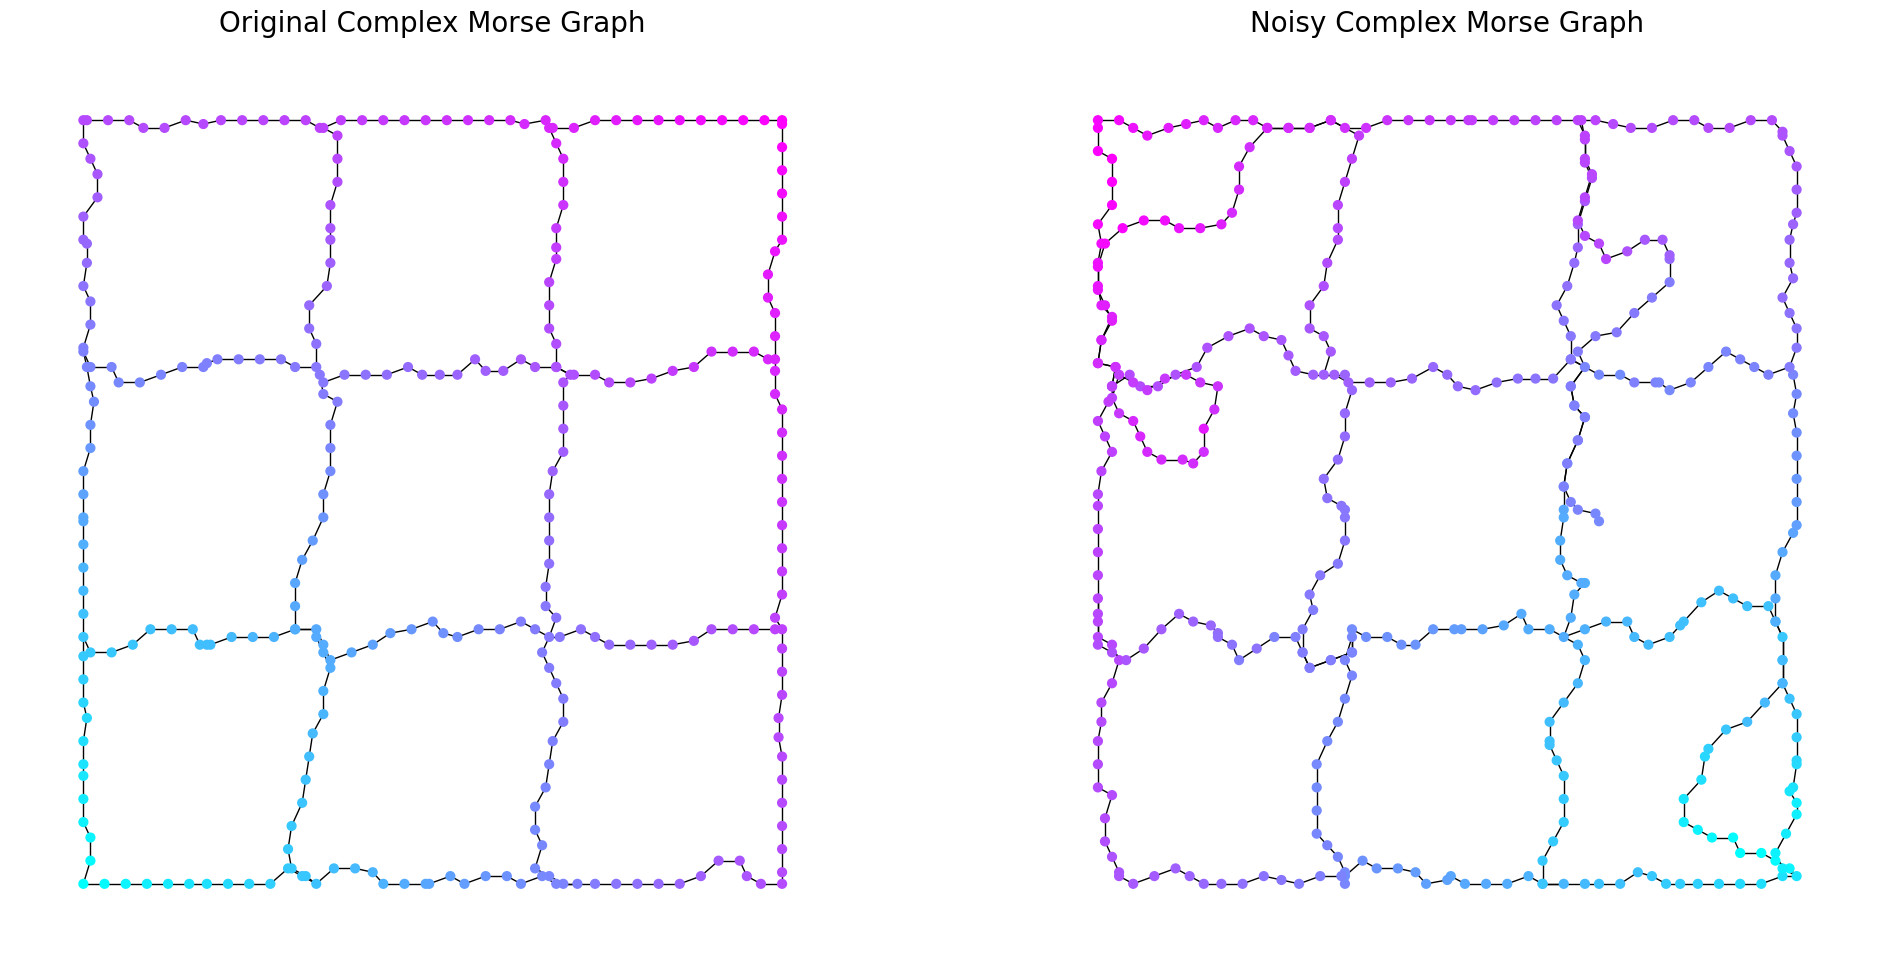

In [161]:
# mg_node_color, mg_noisy_node_color = color_from_coupling(mg, mg_net[0], mg_noisy, mg_noisy_net[0], coupling)

mg_node_color = color_by_position(mg)
mg_noisy_node_color = color_transfer_expected_color(
  mg_net, 
  mg_noisy_net, 
  coupling,
  mg_node_color, 
)

fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(
  ax=axis[0], 
  node_size=40, 
  node_color=mg_node_color, 
  # labels={n: str(n) if n == 0 or n == 1743 else '' for n in mg.nodes()},
  cmap=cmap
)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(
  ax=axis[1], 
  node_size=40, 
  node_color=mg_noisy_node_color,
  cmap=cmap
)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()